In [83]:
import numpy as np
import pandas as pd
%matplotlib inline

In [157]:
n = str(1) #chiller number
datatype = "ConFlow" #"EvaFlow" #"Temp" #"Power"
monthlist = ["05","06","07","08","09","10","11"]

# create dataframe for each month
df = {}
for i in monthlist:
    file1 = "Chiller"+n+"_"+datatype+"_"+str(2017)+i
    df[i] = pd.read_csv("data/"+file1+".csv")

# concatenate data
df_full = pd.concat([df[i] for i in monthlist])

# check that columns are same for each month and total (no mistake in dataset)
for i in monthlist:
    assert(len(df_full.columns)==len(df[i].columns))

In [158]:
# Change index to time series, datetime format
df_full.index = pd.to_datetime(df_full['ts'])
df_full.drop('ts', axis=1, inplace=True)

In [159]:
# If exists, drop redundant columns with unique values
for col in df_full.columns:
    if len(df_full[col].unique()) == 1:
        print(col+": "+str(df_full[col].unique()[0]))
        df_full.drop(col,inplace=True,axis=1)

ieee: d5df68
receivedSync: nan
quality: nan
upstream: nan
downstream: nan
inletTemp: nan
outletTemp: nan
degree: nan
unit: nan


In [160]:
# Write to CSV file
df_full.to_csv("data/Chiller"+n+"_"+datatype+"_full.csv")

In [161]:
df_full.columns

Index([u'gatewayId', u'linkQuality', u'flowRate', u'flowSpeed',
       u'totalFlowRate', u'positiveTotalFlow', u'positiveTotalFlowDecimal'],
      dtype='object')

In [181]:
df_full.gatewayId.unique()

array([18,  0], dtype=int64)

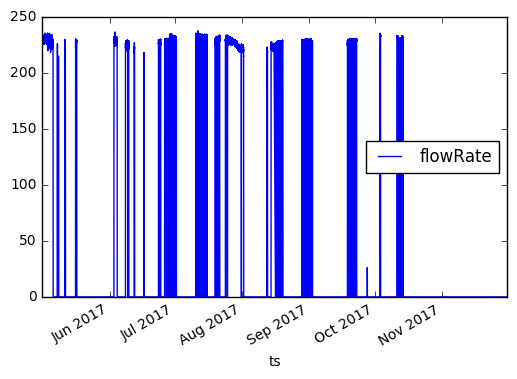

In [180]:
#plot without anomalies (removes extremely negative values)
df_clean = df_full.drop([df_full.totalFlowRate.argmin()])
df_clean[['flowRate']].plot()